#### Gather

1. The WeRateDogs Twitter archive

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Download the Tweet image prediction file with code

In [16]:
import requests
from io import BytesIO

In [17]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [18]:
image_predictions = pd.read_csv(BytesIO(data.content),sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Download the file programatically
image_predictions.to_csv('image_predictions.tsv',sep = '\t')

3. Retweet count and favorite count data

In [7]:
import tweepy

In [8]:
consumer_key = 'JvmgOzu8NrRBMH3B22ak6kMAR'
consumer_secret = 'Iz8LPtze2RqVBiKajlMKqzOhn4i3vPhPWhTMN8CXOAAkcAwnST'
access_token = '3060607657-EM3YTfYsp97zKIthqyXrXF5JU18UlXIrN2sDJru'
access_secret = 'V4PYgxaIw434IP5E7Tf2tdxkGX9u3VB8gNTLppMGO21dL'

In [9]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [4]:
import json

In [48]:
with open("tweet_json.txt","w") as outfile:
    for tweet_id in twitter_archives['tweet_id']:
        try:
            tweet = api.get_status(tweet_id,tweet_mode = 'extended')
            json.dump(tweet._json,outfile)
            outfile.write("\n")
        except Exception as e:
            print(str(tweet_id) + str(e))

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778[{'code': 144, 'message': 'No status found wit

Rate limit reached. Sleeping for: 673


754011816964026368[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 674


In [53]:
data = []
with open('tweet_json.txt','r') as readfile:
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)
tweet_api_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36782,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7845,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31669,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5806,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23858,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3844,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40103,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8003,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38305,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,8652,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Assess
1. tweet api_data file

In [45]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

- Some columns are unrelated such as user, favorited, retweeted as these are based on the personal user information
- Some columns contain mostly null data: contributors, coordinates, geo, place, quoted_status, quoted_status_id,  quoted_status_id_str, quoted_status_permalink
- Some columns seem to contain the whole HTML tags

In [8]:
tweet_api_data.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2333.000000,2.333000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2333.000000
mean,7673.616802,7.419279e+17,7.440692e+17,2.040329e+16,8.113972e+17,2761.972996
std,11911.620287,6.820607e+16,7.524295e+16,1.260797e+17,6.295843e+16,4673.778028
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1333.000000,6.782786e+17,6.757073e+17,3.589728e+08,7.761338e+17,555.000000
50%,3340.000000,7.184547e+17,7.032559e+17,4.196984e+09,8.281173e+17,1292.000000
75%,9426.000000,7.986654e+17,8.233264e+17,4.196984e+09,8.637581e+17,3212.000000
max,158981.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79319.000000


In [11]:
tweet_api_data.possibly_sensitive.value_counts()

False    2199
Name: possibly_sensitive, dtype: int64

In [12]:
tweet_api_data.possibly_sensitive_appealable.value_counts()

False    2199
Name: possibly_sensitive_appealable, dtype: int64

both possibly_sensitive and possibly_sensitive_appealable columns only have "False" as value

2. image_predictions file

In [72]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
image_predictions.duplicated().any()

False

In [73]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


It doesn't seems like there is any issue with image_prediction table

3. twitter_achives

In [34]:
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- the dog name may not be accurate, some names are a or an.
- the dog name have None string that should be a null instead.
- Column name doggo, floofer, puppo, and pupper has value either None or its column name.
- timestamp should be in datetime instead of string
- some rating wasn't capture correctly. For example: 

    "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho*. "
    960 and 00 were recorded as numerator and denominator respectively instead of 13 and 10

In [38]:
twitter_archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_archives.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
twitter_archives.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
twitter_archives.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Tidiness

1. According to this StackOverFlow link: https://stackoverflow.com/questions/18869688/twitter-api-check-if-a-tweet-is-a-retweet
If the tweet is a retweet then the column will contains some data, else it will be blank. From observing the table, we can see that some tweets in the tweet_api_data are retweets. 
2. created_at / timestamp, source, in_reply_to_status_id, in_reply_to_user_id are dupli-
cated in tweet_api_data table and twitter_archive table
3. tweet_api_data and image_predictions should be part of twitter_archive table
4. Entities data seems to contain image information which are already contained in the twitter
archive data, like the image_url and extended url
5. Extended entities column contains duplicate information of the entities column
   

#### Clean

In [44]:
# create a copy of each dataframes
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

In [70]:
#Cleaning the twitter_api_data table
#issue: some tweets in the tweet_api_data are retweets
tweet_api_data_clean.retweeted_status.count()

165

There are 165 retweets, these rows need to be removed in order as these rows do not contain the data we need since they came from different sources

In [60]:
retweed_index = tweet_api_data_clean[tweet_api_data_clean.retweeted_status.notnull()].index

In [61]:
tweet_api_data_clean.drop(axis = 0, index = retweed_index,inplace=True)

In [68]:
tweet_api_data.shape[0] - tweet_api_data_clean.shape[0]

165

Confirm all 165 rows containing retweets have been removed

#### Cleaning the twitter_archives table

#### created_at / timestamp, source, in_reply_to_status_id, in_reply_to_user_id are dupli- cated in tweet_api_data table and twitter_archive table

In [102]:
#check matching column columns between two tables
set(tweet_api_data_clean.columns).intersection(set(twitter_archives_clean.columns))

{'in_reply_to_status_id', 'in_reply_to_user_id', 'source'}

In [109]:
#drop these columns from twitter_archives tables
twitter_archives_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source','timestamp'],axis = 1, inplace = True)

In [110]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


#### tweet_api_data and image_predictions should be part of twitter_archive table

#### Action: 
Merging tweet_api_data and image_predictions on tweet_id and id

In [113]:
#merging tweet_api_data & twitter_archives tables
twitter_archives_clean_1 = pd.merge(left = twitter_archives_clean,right = tweet_api_data_clean,left_on = 'tweet_id',right_on = 'id',how = 'inner')

In [114]:
twitter_archives_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 45 columns):
tweet_id                         2168 non-null int64
text                             2168 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    2110 non-null object
rating_numerator                 2168 non-null int64
rating_denominator               2168 non-null int64
name                             2168 non-null object
doggo                            2168 non-null object
floofer                          2168 non-null object
pupper                           2168 non-null object
puppo                            2168 non-null object
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2168 non-null object
display_text_range               2168 non-nul

In [123]:
#merging image_prediction table with the merged table above
twitter_archives_clean_final = pd.merge(left = twitter_archives_clean_1, right = image_predictions_clean,on = 'tweet_id',how = 'inner')

In [124]:
twitter_archives_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 56 columns):
tweet_id                         1987 non-null int64
text                             1987 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1987 non-null object
rating_numerator                 1987 non-null int64
rating_denominator               1987 non-null int64
name                             1987 non-null object
doggo                            1987 non-null object
floofer                          1987 non-null object
pupper                           1987 non-null object
puppo                            1987 non-null object
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       1987 non-null object
display_text_range               1987 non-nul

### Quality

Removing all columns with null or small number of non-null data. Including both possibly_sensitive and possibly_sensitive_appealable as these only have "False" as value

In [125]:
twitter_archives_clean_final.drop(['retweeted_status_id','retweeted_status_user_id',
                                   'retweeted_status_timestamp','contributors','coordinates',
                                   'geo','in_reply_to_screen_name','in_reply_to_status_id',
                                   'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
                                  'place','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink',
                                  'retweeted_status','possibly_sensitive','possibly_sensitive_appealable'],axis = 1,inplace = True)

In [126]:
twitter_archives_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 37 columns):
tweet_id              1987 non-null int64
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
created_at            1987 non-null object
display_text_range    1987 non-null object
entities              1987 non-null object
extended_entities     1987 non-null object
favorite_count        1987 non-null int64
favorited             1987 non-null bool
full_text             1987 non-null object
id                    1987 non-null int64
id_str                1987 non-null object
is_quote_status       1987 non-null bool
lang                  1987 non-null object

###### Column name doggo, floofer, puppo, and pupper has value either None or its column name

Changing these value to True (its column name) and False (None) respectively

In [130]:
twitter_archives_clean_final.doggo.replace(['doggo','None'],[True,False],inplace = True)
twitter_archives_clean_final.floofer.replace(['floofer','None'],[True,False],inplace = True)
twitter_archives_clean_final.pupper.replace(['pupper','None'],[True,False],inplace = True)
twitter_archives_clean_final.puppo.replace(['puppo','None'],[True,False],inplace = True)

In [132]:
twitter_archives_clean_final['doggo'].value_counts()

False    1914
True       73
Name: doggo, dtype: int64

In [133]:
twitter_archives_clean_final['floofer'].value_counts()

False    1979
True        8
Name: floofer, dtype: int64

In [134]:
twitter_archives_clean_final['pupper'].value_counts()

False    1775
True      212
Name: pupper, dtype: int64

In [135]:
twitter_archives_clean_final['puppo'].value_counts()

False    1964
True       23
Name: puppo, dtype: int64

In [136]:
twitter_archives_clean_final.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,False,False,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,False,False,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,False,False,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,False,False,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,False,False,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Name of the dog are marked as None instead of nan in twitter_archives_clean table

In [144]:
#Replace none to Nan
twitter_archives_clean_final.name.replace('None',np.nan,inplace = True)
#Testing if the count is any 'None' is still in the table
(twitter_archives_clean_final.name == 'None').any()

False

#### Some dog have name a, an, and the  in `twitter_archives_clean` table

In [147]:
#Replace 'a','an','the' to nan
twitter_archives_clean_final.name.replace(['a','an','the'],np.nan,inplace = True)
(twitter_archives_clean_final.name == 'a').any()

False

#### Some rows have invalid rating

In [154]:
twitter_archives_clean_final.rating_denominator.value_counts()

10     1969
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [155]:
twitter_archives_clean_final.rating_numerator.value_counts()

12      448
10      418
11      396
13      257
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

It should be safe to assume that valid numerator should be 14 or less and the denominator should be 10 as these has the most value counts.

In [157]:
twitter_archives_clean_final = twitter_archives_clean_final[(twitter_archives_clean_final.rating_numerator <= 14) & (twitter_archives_clean_final.rating_denominator == 10)]

In [163]:
#Test
print((twitter_archives_clean_final.rating_numerator > 14).any())
print((twitter_archives_clean_final.rating_denominator != 10).any())

False
False


# Visualize

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Most popular dog name

In [203]:
dog_name = twitter_archives_clean_final.name.value_counts().head(10).sort_values(ascending = True)

In [201]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

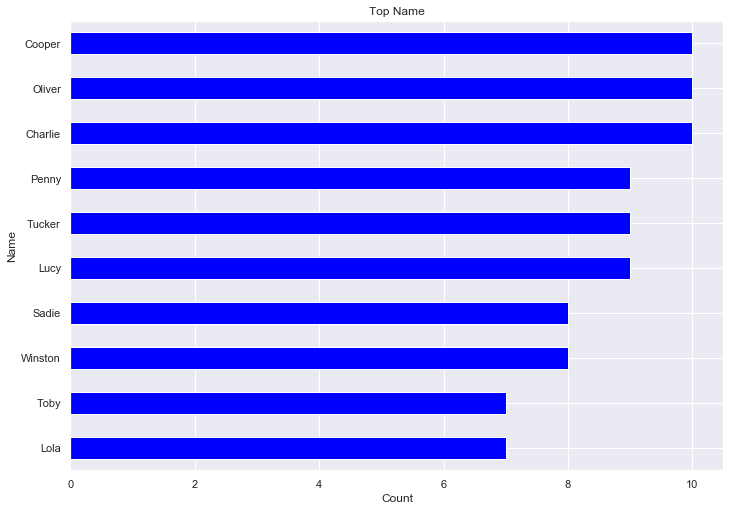

In [210]:
dog_name.plot.barh(width=0.5,color='blue')
plt.title('Top Name')
set_label('Count', 'Name')

Seems like Cooper, Oliver and Charlie are the most popular dog names

### Is there a correlation between retweet count and favorite count?

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Favorite vs Retweet Count')

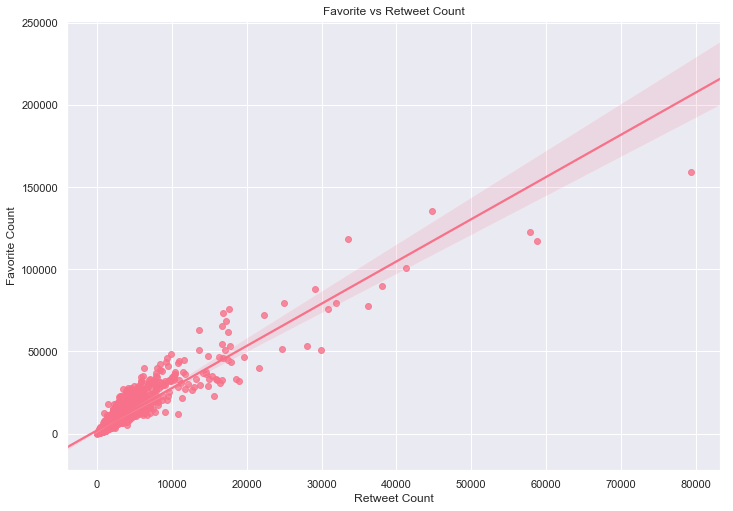

In [213]:
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=twitter_archives_clean_final)
set_label("Retweet Count", "Favorite Count")

plt.title('Favorite vs Retweet Count')

 it seems like there is a positive correlation between favorite count and retweet count.

### Whether there is a relationship between time and rating

Text(0.5, 1.0, 'The median rating of dog tweet per day')

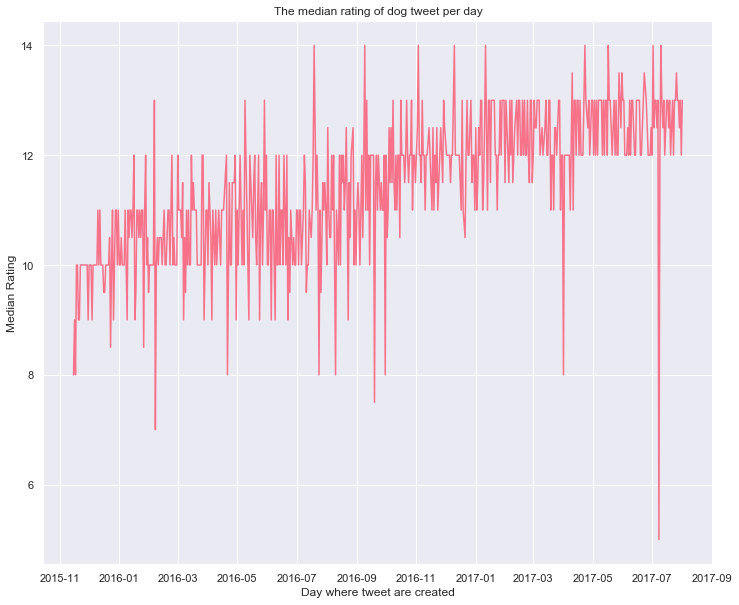

In [216]:
twitter_archives_clean_final['created_at'] = pd.to_datetime(twitter_archives_clean_final.created_at)

plt.subplots(figsize=(12,10))
twitter_archives_clean_final.groupby(twitter_archives_clean_final['created_at'].dt.date).median()['rating_numerator'].plot()
set_label('Day where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per day')

Text(0.5, 1.0, 'The median rating of dog tweet per month')

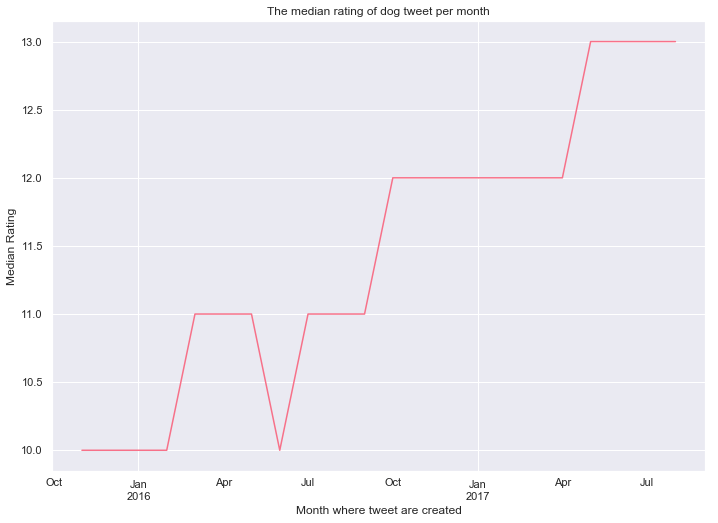

In [219]:
### Changing the graph to month time
twitter_archives_clean_final.groupby(twitter_archives_clean_final['created_at'].dt.to_period("M")).median()['rating_numerator'].plot()
set_label('Month where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per month')

It seems like dog rating increases over time

### Does @weRateDogs tweets more dog rating as it gains popularity?

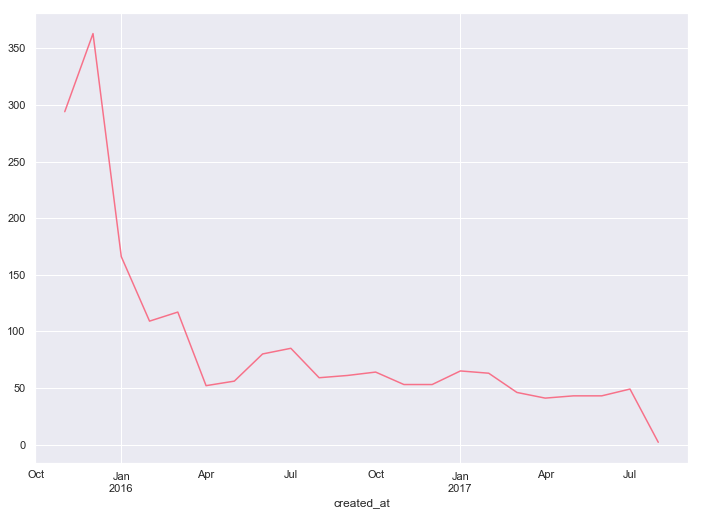

In [232]:
twitter_archives_clean_final.groupby(twitter_archives_clean_final['created_at'].dt.to_period("M")).count()['id'].plot()

 @weRateDogs does not become more active in rating dogs as the month goes by. In particular, the tweet count has the tendency to decrease.

#### Confidence level of  image prediction?


Text(0, 0.5, 'Confidence')

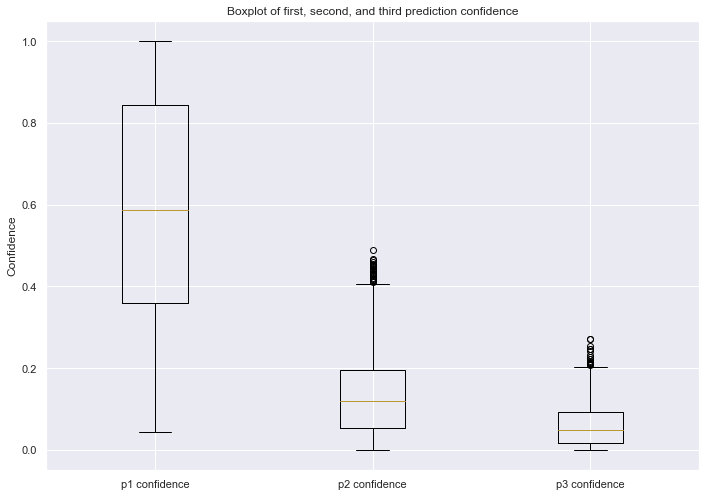

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_archives_clean_final.p1_conf[twitter_archives_clean_final.p1_conf.notnull()],
    twitter_archives_clean_final.p2_conf[twitter_archives_clean_final.p2_conf.notnull()],
    twitter_archives_clean_final.p3_conf[twitter_archives_clean_final.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

We can see that the first prediction tend to be significantly higher (i.e: more accurate) than the second and third prediction. 